In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
df = pd.read_excel('CollectedData.xlsx',sheet_name="Sheet2",header=None)

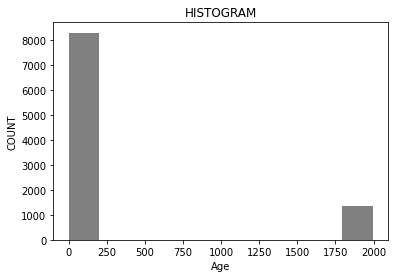

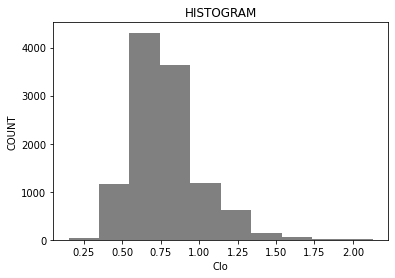

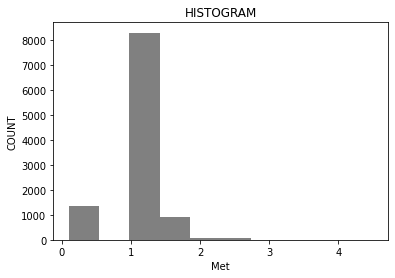

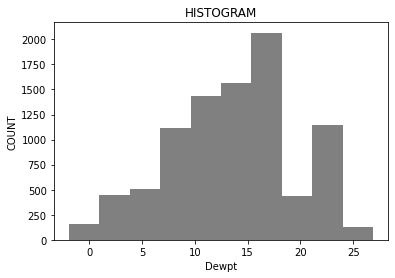

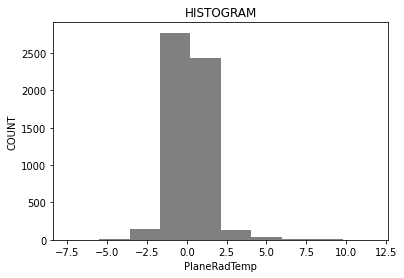

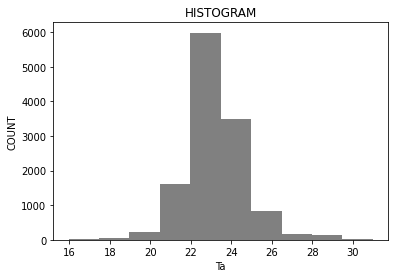

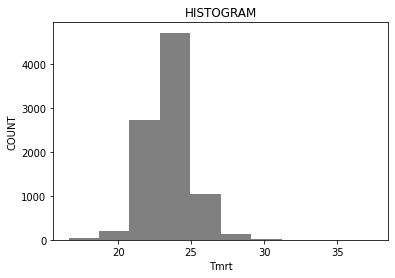

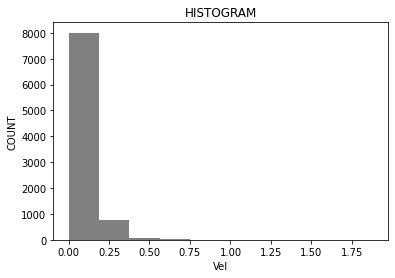

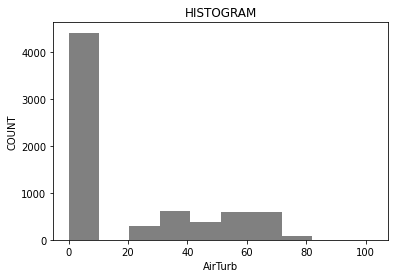

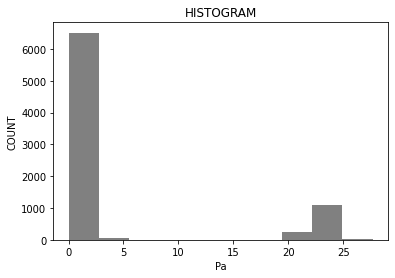

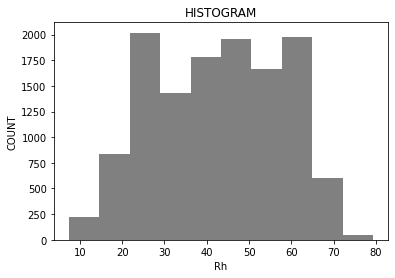

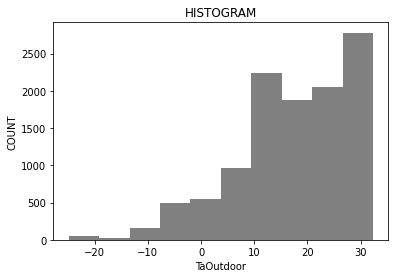

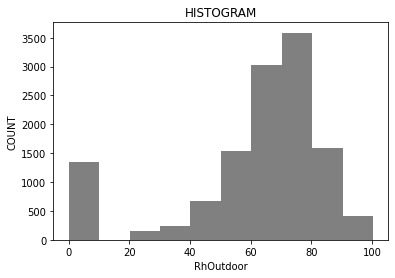

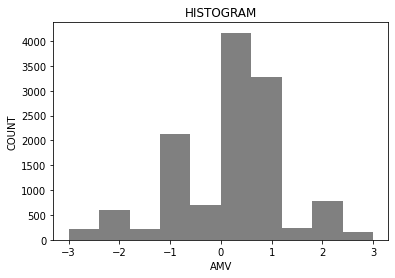

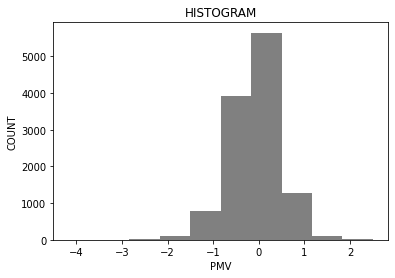

In [47]:
df_temp =pd.read_excel('CollectedData.xlsx',sheet_name="Sheet2",header=None)
df_temp=df_temp.iloc[:,[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]]
df_temp.columns = ['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']
for i in range (0,15):
  h= df_temp[df_temp.columns[i]]
  plt.hist(h,color='grey',bins=10)
  plt.title("HISTOGRAM")
  plt.xlabel(df_temp.columns[i])
  plt.ylabel("COUNT")
  plt.show()

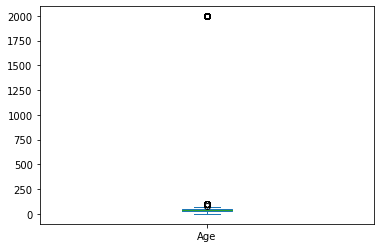

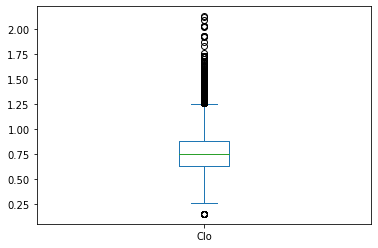

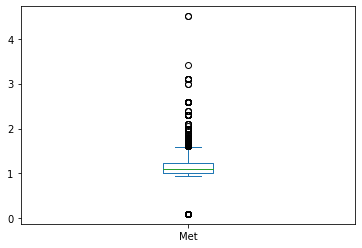

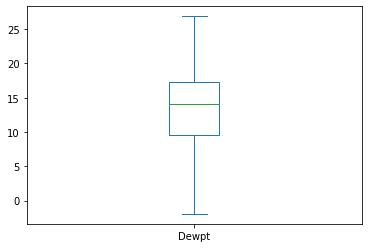

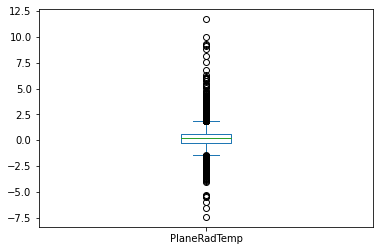

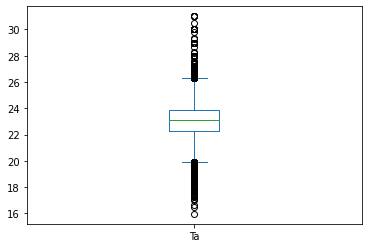

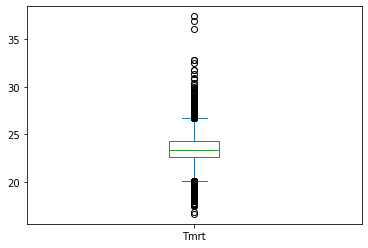

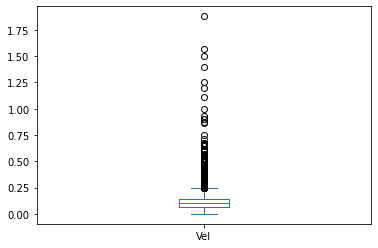

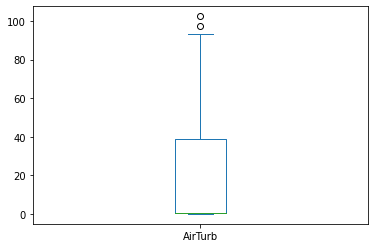

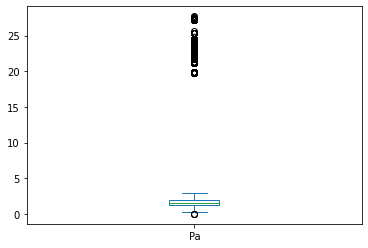

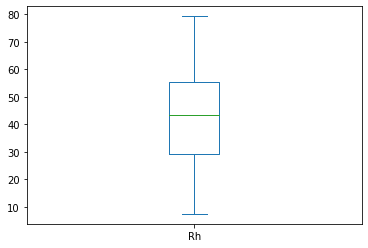

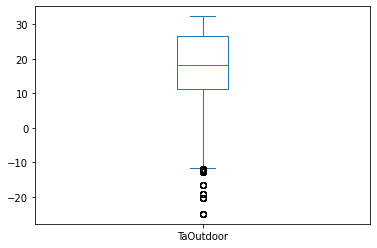

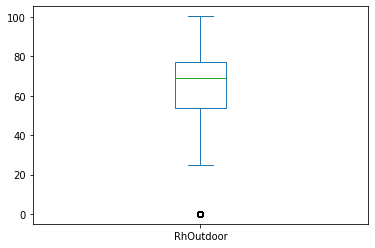

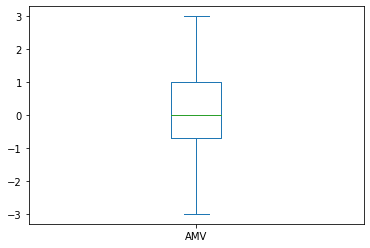

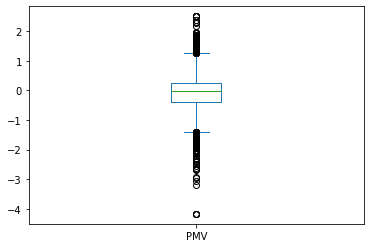

In [50]:
for i in range(0,15):
   df_temp[df_temp.columns[i]].plot(kind='box')
   plt.show()



In [6]:
df=df.iloc[:,[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]]

In [7]:
df.columns = ['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV'] 

In [8]:
df

,Age,Clo,Met,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,NaN,0.65,2.1,NaN,NaN,19.100000,19.629472,0.06,NaN,NaN,51.25,11.55,79.0,2.0,0.34
1,NaN,0.78,2.1,NaN,NaN,19.100000,19.629472,0.06,NaN,NaN,51.30,11.55,79.0,2.0,0.51
2,NaN,1.05,2.1,NaN,NaN,20.000000,19.046655,0.06,NaN,NaN,51.90,11.55,79.0,1.0,0.80
3,NaN,0.40,2.6,NaN,NaN,21.000000,20.153116,0.06,NaN,NaN,49.90,11.55,79.0,3.0,0.76
4,NaN,0.37,3.0,NaN,NaN,23.000000,21.942458,0.06,NaN,NaN,45.60,11.55,79.0,3.0,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12561,1996.0,NaN,0.1,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,22.90,NaN,0.0,1.0,NaN
12562,1996.0,NaN,0.1,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,21.40,NaN,0.0,1.0,NaN
12563,1996.0,NaN,0.1,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,23.10,NaN,0.0,1.0,NaN
12564,1996.0,NaN,0.1,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,22.00,NaN,0.0,1.0,NaN


PRE PROCESSING

In [9]:
df.describe()
df_p = df.describe()
df_p = df_p.T
df_n = df.isnull().sum()
df_n=pd.DataFrame(df_n)
df_n.columns = ['NULLS']
dtypes = pd.DataFrame(df.dtypes)
dtypes.columns = ['dtypes']
df_median = pd.DataFrame(df.median())
df_median.columns = ['median']
df_mode = pd.DataFrame(df.mode())
df_mode = df_mode.T
df_mode.columns = ['mode']
df_variance = pd.DataFrame(df.var())
df_variance.columns =['variance'] 


In [10]:
df_describe = pd.concat([df_p,df_n,dtypes,df_median,df_mode,df_variance],axis=1)
df_describe = df_describe.iloc[:,[0,1,2,3,7,8,9,10,11,12]]

In [11]:
df_describe.to_excel('describe.xlsx')

MISSING VALUES

In [12]:
df = df.dropna(subset=['Ta', 'Rh','RhOutdoor','AMV','PMV'])
df = df.drop(['PlaneRadTemp','AirTurb'],axis = 1)
df['Clo'].fillna(df['Clo'].mean(),inplace=True)
df['Met'].fillna(df['Met'].mean(),inplace=True)
df['Tmrt'].fillna(df['Tmrt'].mean(),inplace=True)
df['Vel'].fillna(df['Vel'].mean(),inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Dewpt'].fillna(df['Dewpt'].median(),inplace=True)
df['Pa'].fillna(df['Pa'].median(),inplace=True)
df['TaOutdoor'].fillna(df['TaOutdoor'].median(),inplace=True)



OUTLIERS

In [13]:

outliers = list()
for i in range(0,len(df.columns)):
    outliers.append((~(np.abs(stats.zscore(df.iloc[:,i])) < 3)).sum())
#dropping outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

CORRELATION MATRIX

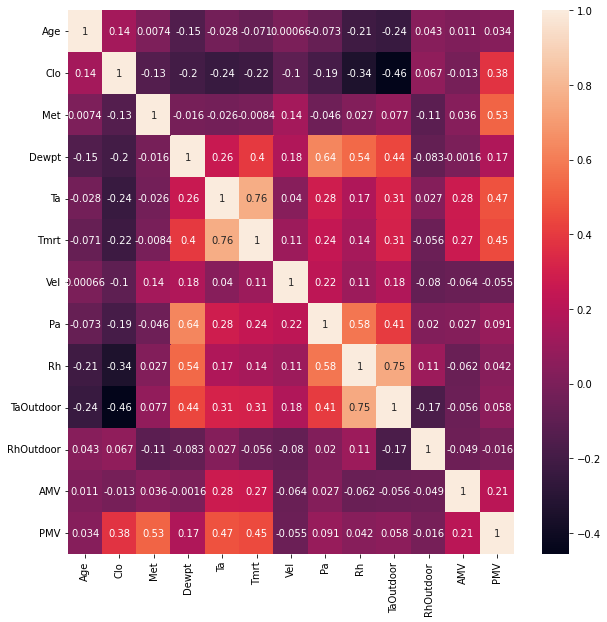

In [14]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True)
plt.show()

In [15]:
df = df.drop(['Vel','TaOutdoor'],axis = 1)

ENTROPY

In [16]:
from scipy.stats import entropy

In [17]:
entropy(df)

array([9.20718357, 9.20782152, 9.23121228,       -inf, 9.2391394 ,
       9.23939942, 9.21684158, 9.18848707, 9.2208708 ,       -inf,
             -inf])

In [18]:
from itertools import combinations
def powerset(string):
    n = len(string)
    for i in range(0,n+1):
        for element in combinations(string,i):
            print(''.join(element))
def get_subsets(fullset):
  listrep = list(fullset)
  n = len(listrep)
  return [[listrep[k] for k in range(n) if i&1<<k] for i in range(2**n)]


In [19]:
inputdimen = list(df.columns)
inputdimen = inputdimen[:-2]
ps = get_subsets(inputdimen)
ps = sorted(ps,key=len)
ps = ps[1:]

FORWARD SELECTION

In [ ]:
model = LinearRegression()
featurevector=list()
r2score=float()
adjr2=float()
for col in ps:
    vector = col
    model.fit(df[vector],df['PMV'])
    y_pred = model.predict(df[vector])
    r2score = r2_score(df['PMV'],y_pred)
    a = 1-((1-r2score)*(df.shape[0]-1)/(df.shape[0]-len(df.columns)-2-1))
    print(a)
    if(a > adjr2):
        adjr2=a
        featurevector = vector.copy()
print(featurevector)
print(adjr2)


In [ ]:
model2 = LogisticRegression()
featurevector=list()
r2score=float()
adjr2=float()
for col in ps:
    vector = col
    model2.fit(df[vector],df['AMV'])
    y_pred = model2.predict(df[vector])
    r2score = r2_score(df['AMV'],y_pred)
    a = 1-((1-r2score)*(df.shape[0]-1)/(df.shape[0]-len(df.columns)-2-1))
    if(a > adjr2):
        adjr2=a
        featurevector = vector.copy()
print(featurevector)
print(adjr2)

BACKWARDS SELECTION

In [ ]:
model = LinearRegression()
featurevector=list()
r2score=float()
adjr2=float()
for col in reversed(ps):
    vector = col
    model.fit(df[vector],df['PMV'])
    y_pred = model.predict(df[vector])
    r2score = r2_score(df['PMV'],y_pred)
    a = 1-((1-r2score)*(df.shape[0]-1)/(df.shape[0]-len(df.columns)-2-1))
    print(a)
    if(a > adjr2):
        adjr2 = a
        featurevector = vector.copy()
print(featurevector)
print(adjr2)

In [ ]:
model2 = LogisticRegression()
featurevector=list()
r2score=float()
adjr2=float()
for col in reversed(ps):
    vector = col
    model2.fit(df[vector],df['AMV'])
    y_pred = model2.predict(df[vector])
    r2score = r2_score(df['AMV'],y_pred)
    a = 1-((1-r2score)*(df.shape[0]-1)/(df.shape[0]-len(df.columns)-2-1))
    print(a)
    if(a > adjr2):
        adjr2=a
        featurevector = vector.copy()
print(featurevector)
print(adjr2)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(df['AMV'], y_predicted)